By Ian Kuk, Kasra Shahrivar, Alex Itzenhuiser

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, classification_report, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2023-05-04 23:25:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘winequality-white.csv’

winequality-white.c 100%[===================>] 258.23K  1.30MB/s    in 0.2s    

2023-05-04 23:25:47 (1.30 MB/s) - ‘winequality-white.csv’ saved [264426/264426]

--2023-05-04 23:25:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[=

In [ ]:
df = pd.read_csv('winequality-white.csv',sep=';')
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
def replace_values(x):
    if x >= 7:
        return 1
    else:
        return 0

df['quality'] = df['quality'].apply(replace_values)


<Axes: >

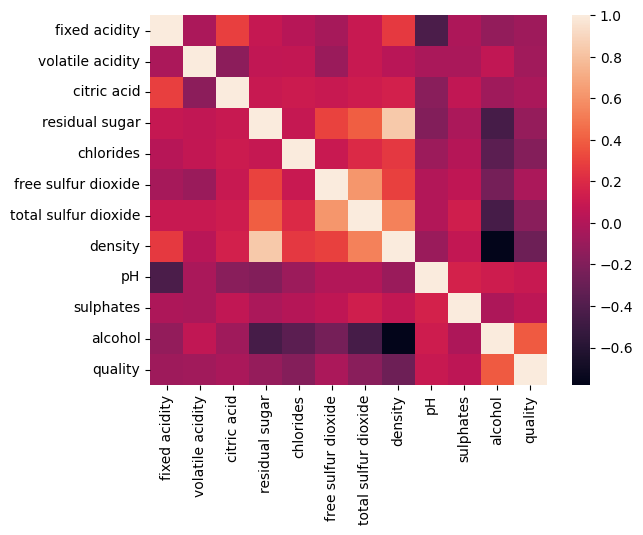

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

In [ ]:
y = df['quality'].values
X = df.drop(['quality'], axis=1).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1234)

In [ ]:
rf = RandomForestClassifier()
params = {'n_estimators': [100, 500, 1000],
          'max_depth': [5, 10, 15],
          'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(rf, params, cv=5)
grid_search.fit(X, y)

best_rf = grid_search.best_estimator_


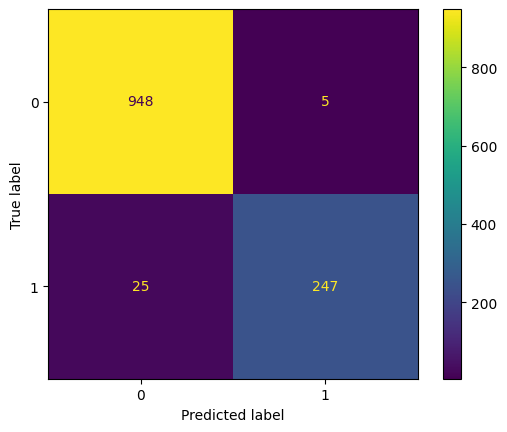

In [ ]:
y_pred = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [ ]:
pos_prec = precision_score(y_test, y_pred, pos_label=1)
neg_prec = precision_score(y_test, y_pred, pos_label=0)
pos_rec = recall_score(y_test, y_pred, pos_label=1)
neg_rec = recall_score(y_test, y_pred, pos_label=0)
print(f"Positive Precision: {pos_prec} Negative Precision: {neg_prec}")
print(f"Positive Recall: {pos_rec} Negative Recall: {neg_rec}")

Positive Precision: 0.9801587301587301 Negative Precision: 0.9743062692702981
Positive Recall: 0.9080882352941176 Negative Recall: 0.9947534102833159


In [ ]:
df = pd.read_csv('winequality-red.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
def replace_values(x):
    if x >= 7:
        return 1
    else:
        return 0

df['quality'] = df['quality'].apply(replace_values)


<Axes: >

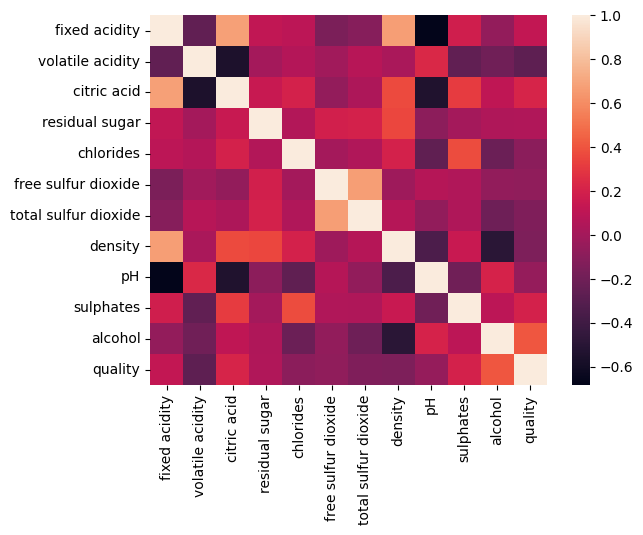

In [ ]:
sns.heatmap(df.corr())

In [ ]:
y = df['quality'].values
X = df.drop(['quality'], axis=1).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1234)

In [ ]:
rf = RandomForestClassifier()

params = {'n_estimators': [100, 500, 1000],
          'max_depth': [5, 10, 15],
          'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(rf, params, cv=5)
grid_search.fit(X, y)

best_rf = grid_search.best_estimator_

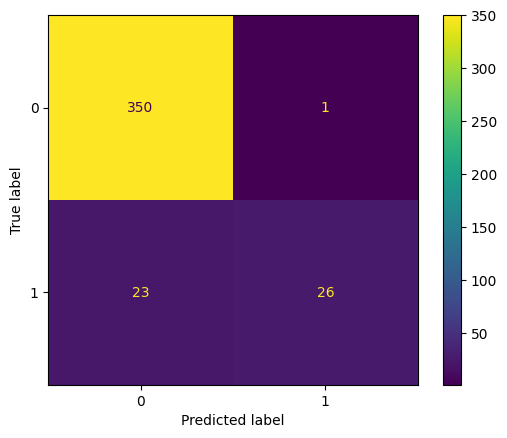

In [ ]:
y_pred = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [ ]:
pos_prec = precision_score(y_test, y_pred, pos_label=1)
neg_prec = precision_score(y_test, y_pred, pos_label=0)
pos_rec = recall_score(y_test, y_pred, pos_label=1)
neg_rec = recall_score(y_test, y_pred, pos_label=0)
print(f"Positive Precision: {pos_prec} Negative Precision: {neg_prec}")
print(f"Positive Recall: {pos_rec} Negative Recall: {neg_rec}")

Positive Precision: 0.9629629629629629 Negative Precision: 0.938337801608579
Positive Recall: 0.5306122448979592 Negative Recall: 0.9971509971509972
